# Preventing Workforce Reduction
As an HR analyst one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify and improve these factors to prevent loss of good people.

Below are the values each column has. The column names are pretty self-explanatory:

- AGE Numerical Value
- ATTRITION Employee leaving the company (0=no, 1=yes)
- BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
- DAILY RATE Numerical Value - Salary Level
- DEPARTMENT (1=HR, 2=R&D, 3=Sales)
- DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME
- EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
- EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
- EMPLOYEE COUNT Numerical Value
- EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID
- ENVIRONMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
- GENDER (1=FEMALE, 2=MALE)
- HOURLY RATE Numerical Value - HOURLY SALARY
- JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
- JOB LEVEL Numerical Value - LEVEL OF JOB
- JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)
- JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
- MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)
- MONTHLY INCOME Numerical Value - MONTHLY SALARY
- MONTHLY RATE Numerical Value - MONTHLY RATE
- NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT
- OVER 18 (1=YES, 2=NO)
- OVERTIME (1=NO, 2=YES)
- PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY
- PERFORMANCE RATING Numerical Value - PERFORMANCE RATING
- RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION
- STANDARD HOURS Numerical Value - STANDARD HOURS
- STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)
- TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED
- TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING
- WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE
- YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY
- YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE
- YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION
- YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

I'll begin with importing all the required libraries:

In [2]:
# Importing all the required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Reading the Train dataset :
train = pd.read_csv("employee_attrition_train.csv")

In [35]:
# reading first few rows:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [36]:
# checking column names of train:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
# reading last 5 rows of train:

In [38]:
train.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1028,50.0,No,Travel_Rarely,264.0,Sales,9.0,3,Marketing,1,1591,...,3,80,1,27,2,3,1,0,0,0


In [39]:
# checking the shape of the train dataset:
row, col = train.shape
print('There are total of {}'.format(row),'rows and {}'.format(col),'columns in the dataset')

There are total of 1029 rows and 35 columns in the dataset


In [40]:
# checking the overall description of train:
# since there are large number of columns, listing them row wise is better option to see all: 
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,893,NaN,NaN,NaN,37.9306,9.39598,18,31,37,44,60
Attrition,1029,2,No,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1024,3,Travel_Rarely,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1002,NaN,NaN,NaN,800.529,408.11,102,458.25,801.5,1162,1496
Department,1029,3,Research & Development,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,934,NaN,NaN,NaN,9.93041,8.42179,1,2,8,16,29
Education,1029,NaN,NaN,NaN,2.89213,1.05354,1,2,3,4,5
EducationField,1029,6,Life Sciences,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1029,NaN,NaN,NaN,1,0,1,1,1,1,1
EmployeeNumber,1029,NaN,NaN,NaN,1024.37,606.302,1,496,1019,1553,2068


Apparently, the mean and the median are almost same. There is a possibility of presence of outliers in monthly income and monthly rate fields. We need to confirm this with the help of boxplots:

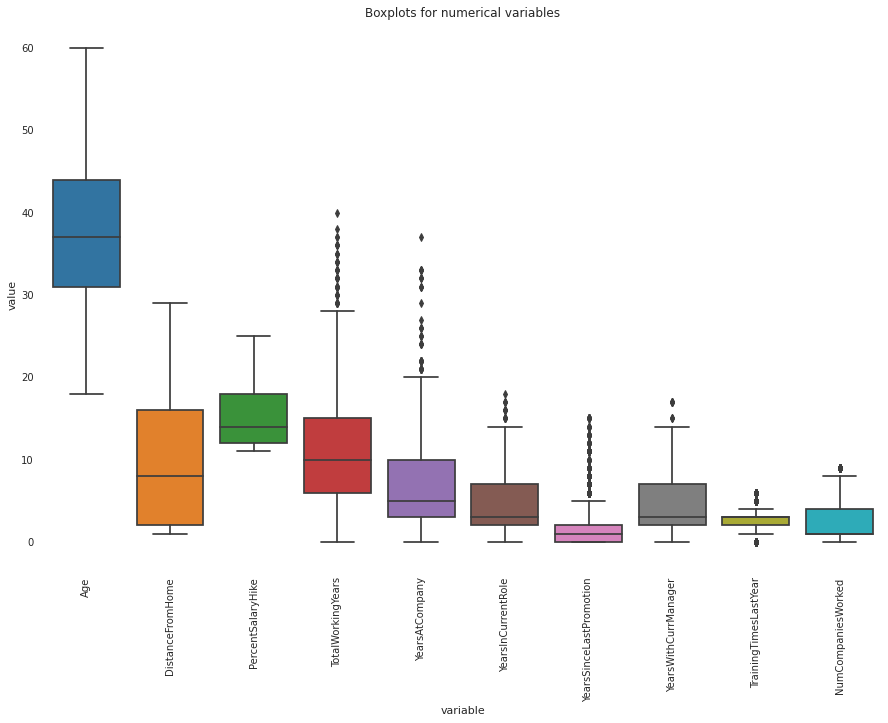

In [41]:
Collection=train[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
CollectionMelt=Collection.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for numerical variables")
bp=sns.boxplot(x='variable',y='value',data=CollectionMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Clearly there are outliers in some columns. Namely:
* TotalWorkingYears
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* TrainingTimesLastYear
* NumCompaniesWorked

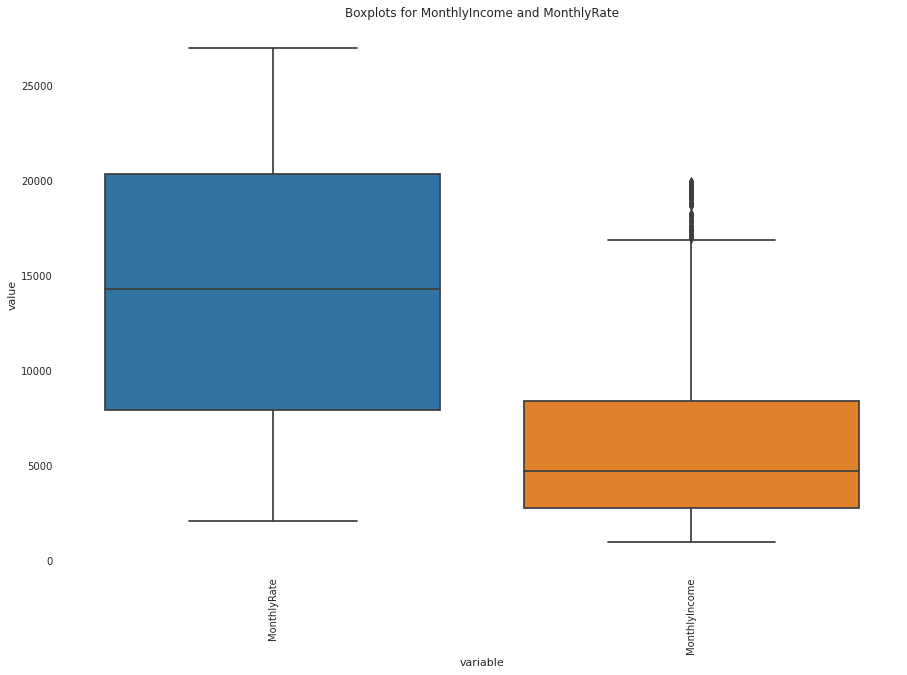

In [42]:
# Now I'll plot Boxplots for MonthlyIncome and MonthlyRate columns:
Collection=Train[['MonthlyRate','MonthlyIncome']]
CollectionMelt=Collection.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for MonthlyIncome and MonthlyRate")
bp=sns.boxplot(x='variable',y='value',data=CollectionMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

The above boxplots show that there are outliers in MonthlyIncome column.

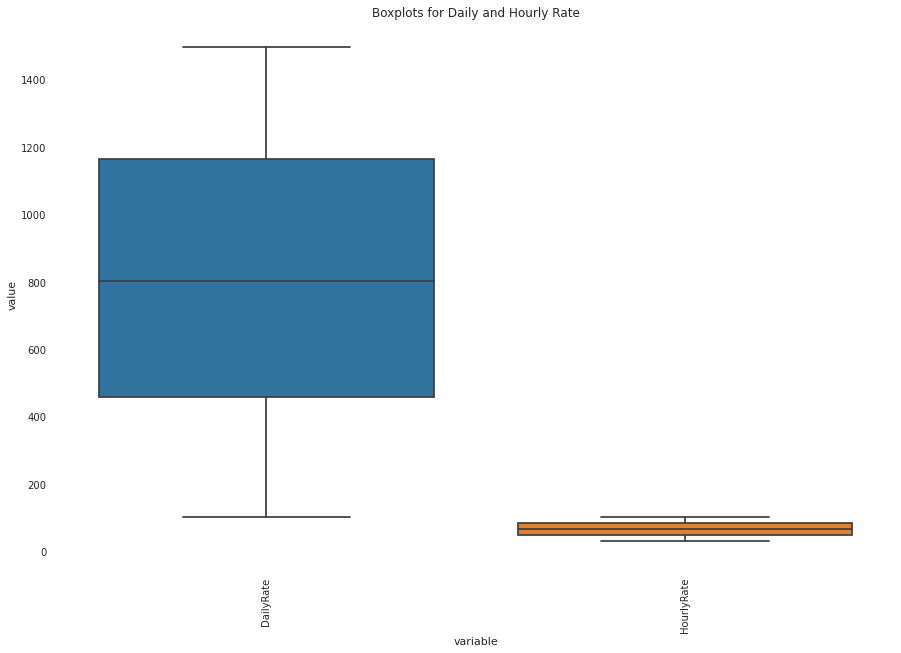

In [43]:
# Boxplots for DailyRate & HourlyRate columns:
Collection=Train[['DailyRate','HourlyRate']]
CollectionMelt=Collection.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Daily and Hourly Rate")
bp=sns.boxplot(x='variable',y='value',data=CollectionMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

The above boxplots show that there are no outliers in DailyRate and HourlyRate columns.

Now I'll create a variable for holding all the numeric data:

In [44]:
Var =train[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                        'MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                        'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','NumCompaniesWorked',
                        'YearsSinceLastPromotion','YearsWithCurrManager']]

Now I'll create a variable to concatinate the actual categorical variables with the Attrition(reduction) Column. Then I'll perform Bivariate analysis:

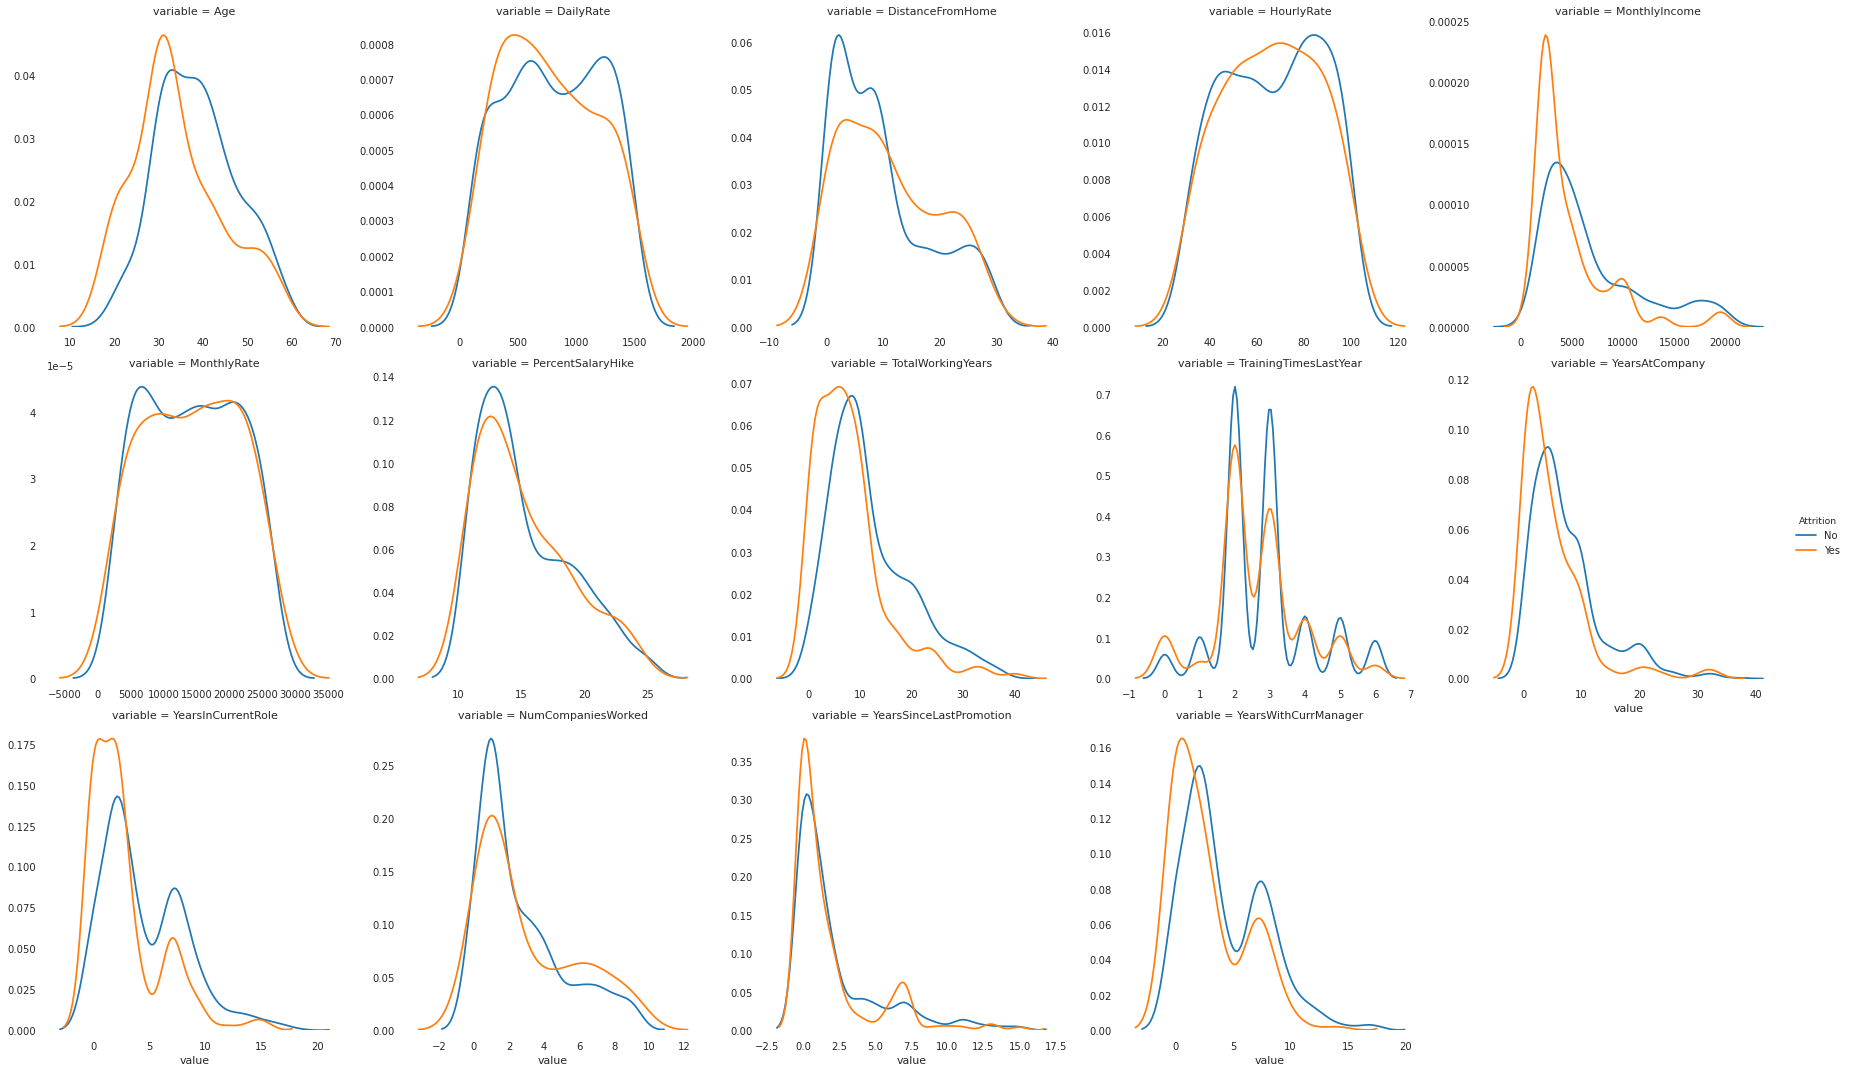

In [45]:
Con_var=Var
Con_var['Attrition']=train['Attrition']
Con_var_data = Con_var.melt(id_vars=['Attrition'])
Con_var_grid = sns.FacetGrid(Con_var_data, col='variable',sharex=False,sharey=False,dropna=True,size=5,col_wrap=5,  hue='Attrition' )
histPlot=Con_var_grid.map(sns.kdeplot,'value' )
Con_var_grid.add_legend()
plt.show()

Points to notice from above plots:
* Employees of Age below 30 (approx)
* Employees whose MonthlyIncome is less than 5000 (approx)
* Employees whose TotalWorkingYears below 10 years (approx)
* YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager below 5 years (approx)

Now I'll plot boxplots for numerical variables:

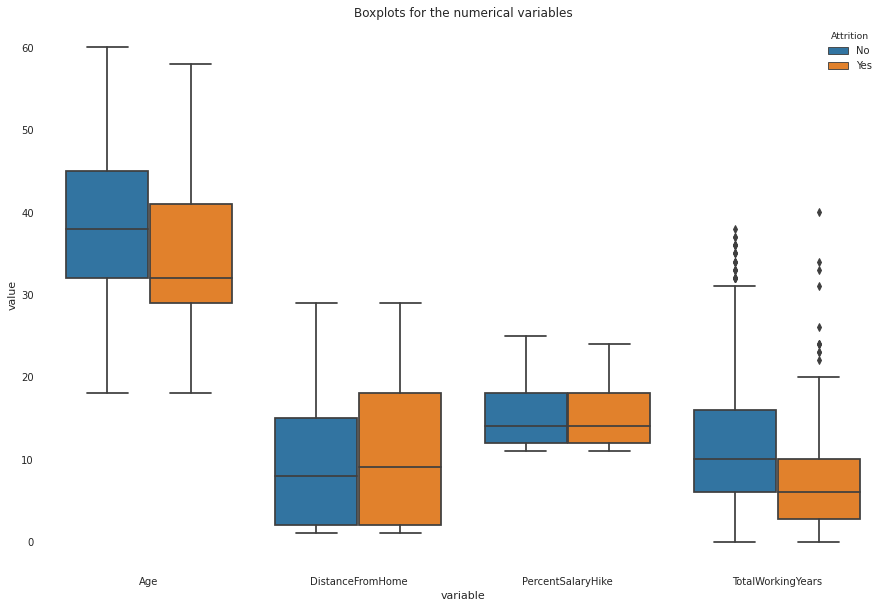

In [46]:
Con_var=train[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears']]
Con_var['Attrition']=train['Attrition']
Con_var_data = Con_var.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for the numerical variables")
bp=sns.boxplot(x='variable',y='value',data=Con_var_data,hue='Attrition')
plt.show()

The above boxplots show the following:
* Percent SalaryHike and DistanceFromHome are not contributing to Attrition
* Age below 30 and TotalWorkingYears below 5 are contributing to Attrition.

Plotting Boxplots for MonthlyRate & MonthlyIncome variables:

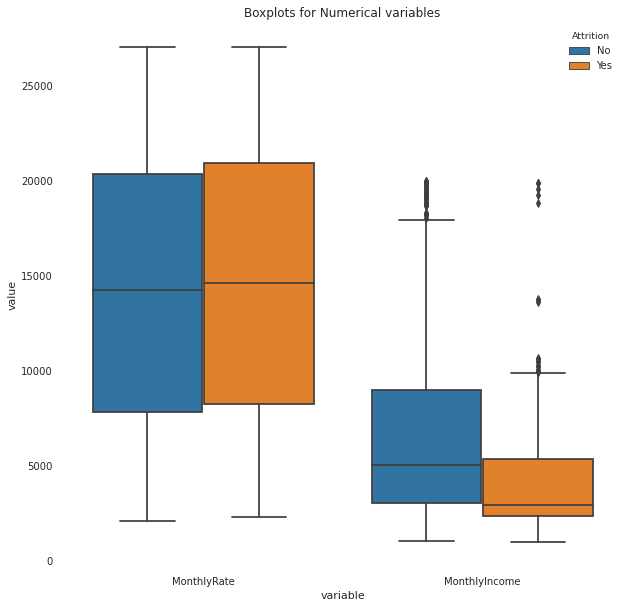

In [47]:
Con_var=Train[['MonthlyRate','MonthlyIncome']]
Con_var['Attrition']=Train['Attrition']
Con_var_data = Con_var.melt(id_vars=['Attrition'])
plt.figure(figsize=(10,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=Con_var_data,hue='Attrition')
plt.show()

Above boxplots tells that the MonthlyRate is not useful to decide the attrition. However, the average income of employees who are contributing to attrition rate is very low.

Now I'll plot Boxplots for some more numeric variables:

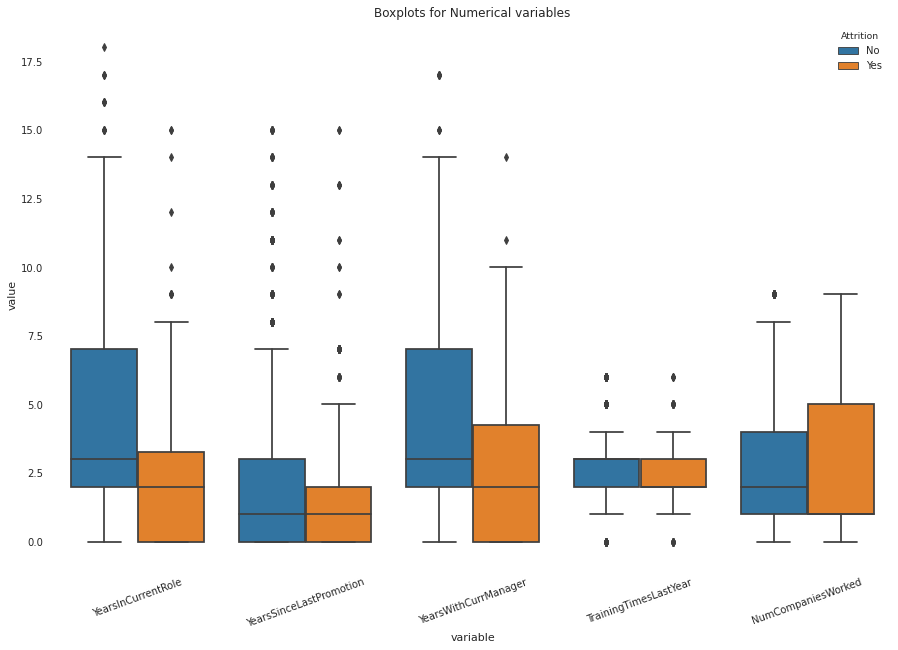

In [48]:
Con_var=train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
Con_var['Attrition']=train['Attrition']
Con_var_data = Con_var.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=Con_var_data,hue='Attrition')
bp.set_xticklabels(bp.get_xticklabels(),rotation=20)
plt.show()

Above boxplots reveal the following information:
* YearsSinceLastPromotion and TrainingTimesLastYear are not contributing much to decide the Attrition rate
* Those employees whose avg years with current manager and yearsInCurrentRole is below 3 years are contributing to Attrition.
* Employees whose NumCompaniesWorked 1-4 years are contributing to attrition

Plotting boxplots for DailyRate & HourlyRate columns:

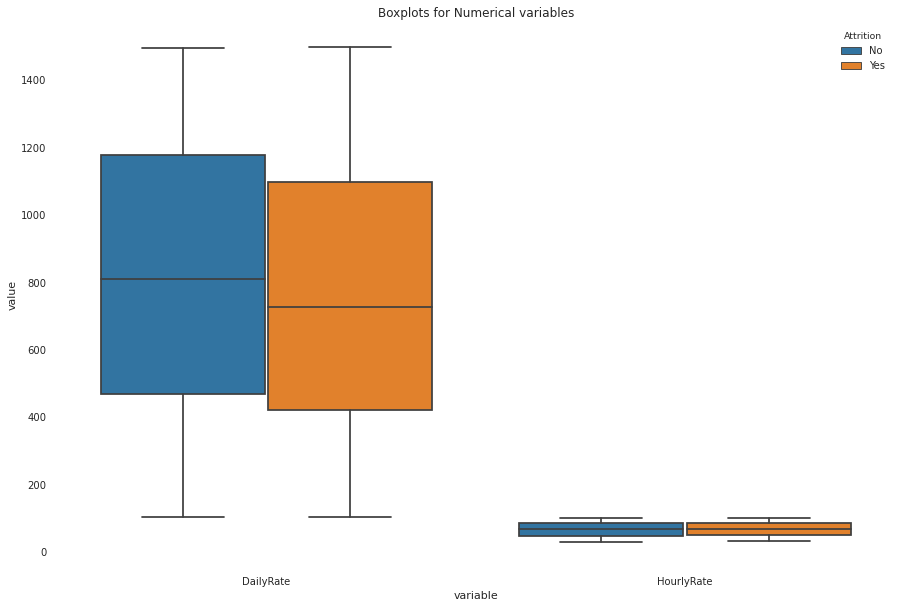

In [49]:
Con_var=train[['DailyRate','HourlyRate']]
Con_var['Attrition']=train['Attrition']
Con_var_data = Con_var.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=Con_var_data,hue='Attrition')
plt.show()

Above boxplots represent the follwing:
* Hourly rate is not contributing much to decide attrition factor
* Althought DailyRate is also not contributing much, the average dailyrate value is less for employees who are contributing to attrition

This is it for now. This dataset has a lot of information. I'll explore it more on part 2 of this notebook. Thanks for your time. Regards.
* Rachit Shukla